# testing esda.shape parameters for toy polygons

In [2]:
# import packages
import pandas as pd
import geopandas as gpd
import esda.shape as es
import shapely as sh
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt

### pyplots

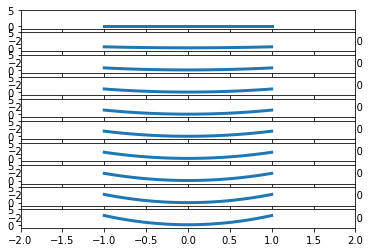

In [3]:
# CURVE TYPE A: (x**2)

fig, ax = plt.subplots(10,1)
lsa = []
i = 0
for a in np.linspace(0,3,10):
    x = np.linspace(-1,1,30)
    y = a*x**2
    coord = [z for z in zip(x, y)]
    lsa.append(LineString(coord))
    ax[i].plot(x, y, linewidth = 3)
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-1,5])
    i += 1

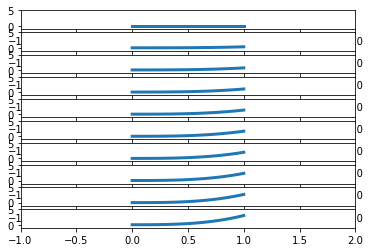

In [4]:
# CURVE TYPE B: (x**3))

fig, ax = plt.subplots(10,1)
lsb = []
i = 0
for b in np.linspace(0,3,10):
    x = np.linspace(0,1,30)
    y = b*x**3
    coord = [z for z in zip(x, y)]
    lsb.append(LineString(coord))
    ax[i].plot(x, y, linewidth = 3)
    ax[i].set_xlim([-1,2])
    ax[i].set_ylim([-1,5])
    i += 1


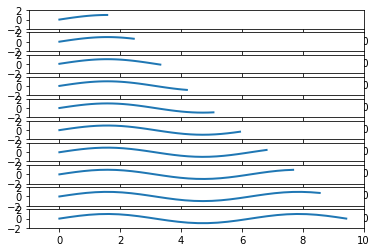

In [5]:
# CURVE TYPE C: SINUS
fig, ax = plt.subplots(10,1)

i = 0
lsc = []
for c in np.linspace(np.pi/2, 3*np.pi, 10):
    x = np.linspace(0,c,30)
    y = np.sin(x)
    coord = [z for z in zip(x, y)]
    lsc.append(LineString(coord))
    ax[i].plot(x, y, linewidth = 2)
    ax[i].set_xlim([-1,10])
    ax[i].set_ylim([-2,2])
    i += 1



# Numbers

### IDEAL SHAPE MEASURES 

from [esda.shape](https://pysal.org/esda/_modules/esda/shape.html#equivalent_rectangular_index)

*excluded: length_width_diff, fractal_dimension, squareness*

* `isp` **isoperimetric_quotient** defined as the ratio of a polygon's area to the area of the equi-perimeter circle
* `isa` **isoareal_quotient** ratio of a polygon's perimeter to the perimeter of the equi-areal circle
* `min` **minimum bounding circle ratio**  The Reock compactness measure, defined by the ratio of areas between the minimum bounding/containing circle of a shape and the shape itself. **aka circular compactness!**
* `rad` **radii ratio** The ratio of the radius of the equi-areal circle to the radius of the MBC
* `bou` **boundary amplitude**  length of the boundary of the convex hull divided by the length of the boundary of the original shape
* `dia` **diameter ratio** It is given as the ratio between the minimum and maximum shape diameter.
* `con` **convex hull ratio** ratio of the area of the convex hull to the area of the shape itself
* `rec` **rectangularity** Ratio of the area of the shape to the area of its minimum bounding rotated rectangle (reveals a polygon's degree of being curved inward)
* `sha` **shape index**   Schumm’s shape index (Schumm (1956) in MacEachren 1985) (sqrt(A) / pi) /  R,   where A is the area and R is the radius of the minimum bounding circle.
* `equ` **equivalent rectangular index**



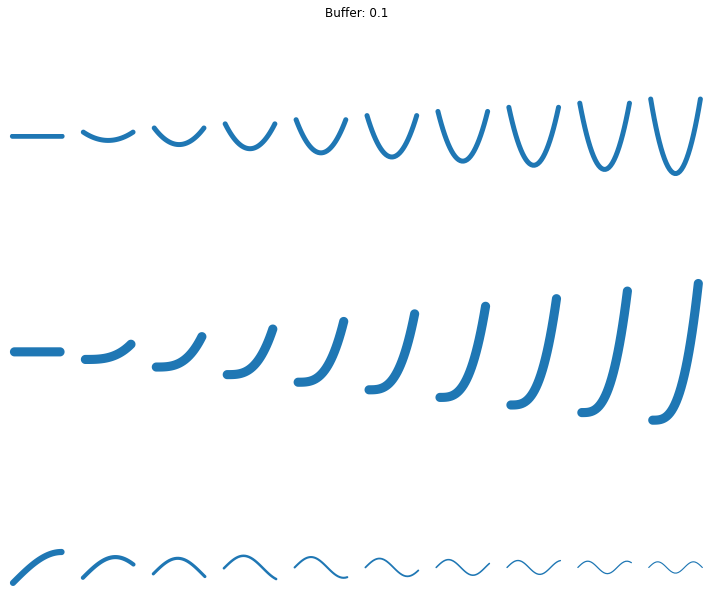

In [6]:
### BUFFER 0.1 (lineshaped)

# SET VAR NAMES

vs = ["isp", "isa", "min", "rad", "bou", "dia", "con", "rec", "sha", "equ"]
mybuf = 0.1

# MAKE CURVES
ls = []
types = []

# PARAMETER SPACES
A = np.linspace(0,3,10)
B = np.linspace(0,3,10)
C = np.linspace(np.pi/2, 3*np.pi, 10)

params = list(A) + list(B) + list(C)

x = np.linspace(-1,1,30)
for a in A:
    y = a*x**2
    coord = [z for z in zip(x, y)]
    ls.append(LineString(coord))
    types.append("a")

x = np.linspace(0,1,30)
for b in B:
    y = b*x**3
    coord = [z for z in zip(x, y)]
    ls.append(LineString(coord))
    types.append("b")

for c in C:
    x = np.linspace(0,c,30)
    y = np.sin(x)
    coord = [z for z in zip(x, y)]
    ls.append(LineString(coord))
    types.append("c")

gd = gpd.GeoDataFrame({"type": types, "param": params, "geometry": ls})
gd["length"] = gd.geometry.length
gd["buffer"] = gd.geometry.buffer(mybuf)
gd["area"] = gd["buffer"].area
# COMPUTE ESDA SHAPE PARAMS
gd["isp"] = es.isoperimetric_quotient(gd["buffer"])
gd["isa"] = es.isoareal_quotient(gd["buffer"])
gd["min"] = es.minimum_bounding_circle_ratio(gd["buffer"])
gd["rad"] = es.radii_ratio(gd["buffer"])
gd["bou"] = es.boundary_amplitude(gd["buffer"])
gd["dia"] = es.diameter_ratio(gd["buffer"])
gd["con"] = es.convex_hull_ratio(gd["buffer"])
gd["rec"] = es.rectangularity(gd["buffer"])
gd["sha"] = es.shape_index(gd["buffer"])
gd["equ"] = es.equivalent_rectangular_index(gd["buffer"])

maxs = []
for v in vs:
    maxs.append(max(gd[v]))
pmax = max(maxs)

fig, ax = plt.subplots(3,10, figsize = (10,10))
k = 0
for i in range(3):
    for j in range(10):
        gd[gd.index == k]["buffer"].plot(ax = ax[i,j])
        
        k += 1
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.suptitle("Buffer: " + str(mybuf));

gd1 = gd.copy()
del(gd)


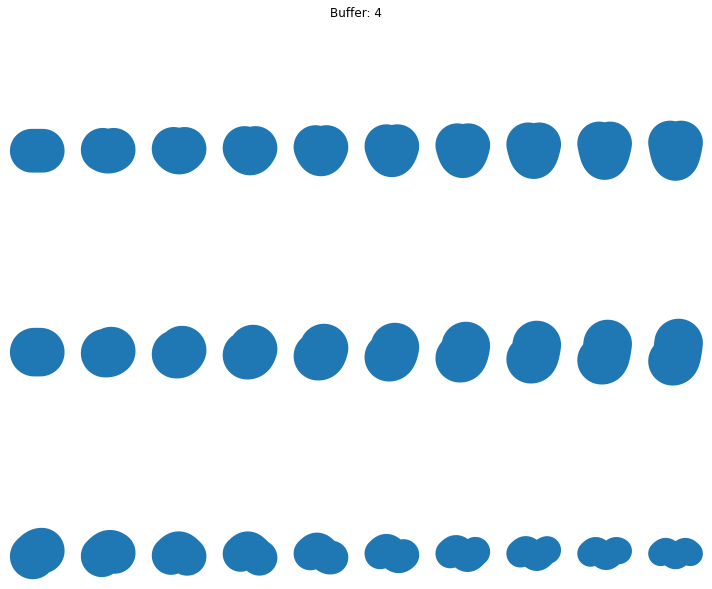

In [7]:
### BUFFER 4 (circular)

# SET VAR NAMES

vs = ["isp", "isa", "min", "rad", "bou", "dia", "con", "rec", "sha", "equ"]
mybuf = 4

# MAKE CURVES
ls = []
types = []

# PARAMETER SPACES
A = np.linspace(0,3,10)
B = np.linspace(0,3,10)
C = np.linspace(np.pi/2, 3*np.pi, 10)

params = list(A) + list(B) + list(C)

x = np.linspace(-1,1,30)
for a in A:
    y = a*x**2
    coord = [z for z in zip(x, y)]
    ls.append(LineString(coord))
    types.append("a")

x = np.linspace(0,1,30)
for b in B:
    y = b*x**3
    coord = [z for z in zip(x, y)]
    ls.append(LineString(coord))
    types.append("b")

for c in C:
    x = np.linspace(0,c,30)
    y = np.sin(x)
    coord = [z for z in zip(x, y)]
    ls.append(LineString(coord))
    types.append("c")

gd = gpd.GeoDataFrame({"type": types, "param": params, "geometry": ls})
gd["length"] = gd.geometry.length
gd["buffer"] = gd.geometry.buffer(mybuf)
gd["area"] = gd["buffer"].area
# COMPUTE ESDA SHAPE PARAMS
gd["isp"] = es.isoperimetric_quotient(gd["buffer"])
gd["isa"] = es.isoareal_quotient(gd["buffer"])
gd["min"] = es.minimum_bounding_circle_ratio(gd["buffer"])
gd["rad"] = es.radii_ratio(gd["buffer"])
gd["bou"] = es.boundary_amplitude(gd["buffer"])
gd["dia"] = es.diameter_ratio(gd["buffer"])
gd["con"] = es.convex_hull_ratio(gd["buffer"])
gd["rec"] = es.rectangularity(gd["buffer"])
gd["sha"] = es.shape_index(gd["buffer"])
gd["equ"] = es.equivalent_rectangular_index(gd["buffer"])

maxs = []
for v in vs:
    maxs.append(max(gd[v]))
pmax = max(maxs)

fig, ax = plt.subplots(3,10, figsize = (10,10))
k = 0
for i in range(3):
    for j in range(10):
        gd[gd.index == k]["buffer"].plot(ax = ax[i,j])
        
        k += 1
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.suptitle("Buffer: " + str(mybuf));

gd4 = gd.copy()
del(gd)

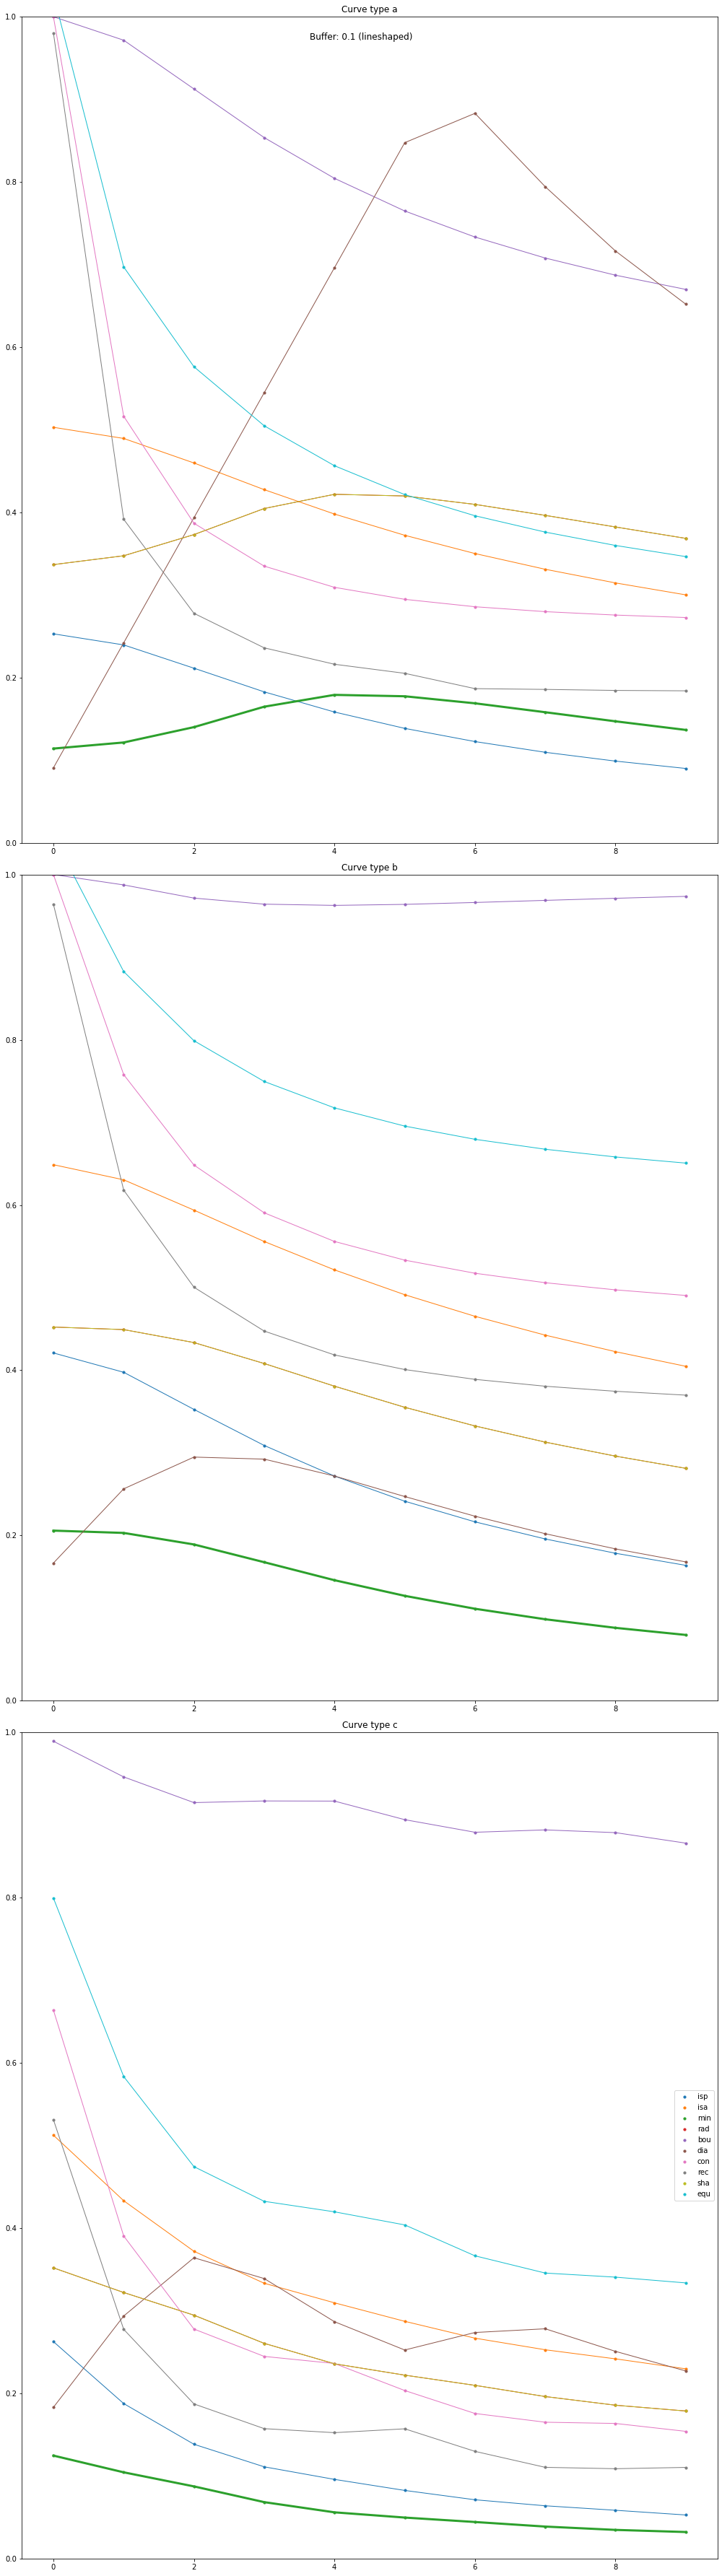

In [8]:
gd = gd1.copy()
fig, ax = plt.subplots(3,1, figsize = (14,50))
i = 0
for t in ["a", "b", "c"]: 
    
    for v in vs:

        if v == "min":
            mlw = 3
        else:
            mlw = 1

        ax[i].scatter(
            x = np.arange(len(gd[gd["type"]==t])), 
            y = gd[gd["type"]==t][v], 
            label = v,
            s = 10)
        ax[i].plot(
            np.arange(len(gd[gd["type"]==t])),
            gd[gd["type"]==t][v],
            linewidth = mlw)
        ax[i].set_title("Curve type " + t)
        ax[i].set_ylim((0,1))
    i += 1
plt.legend()
plt.suptitle("Buffer: 0.1 (lineshaped)")
plt.tight_layout()

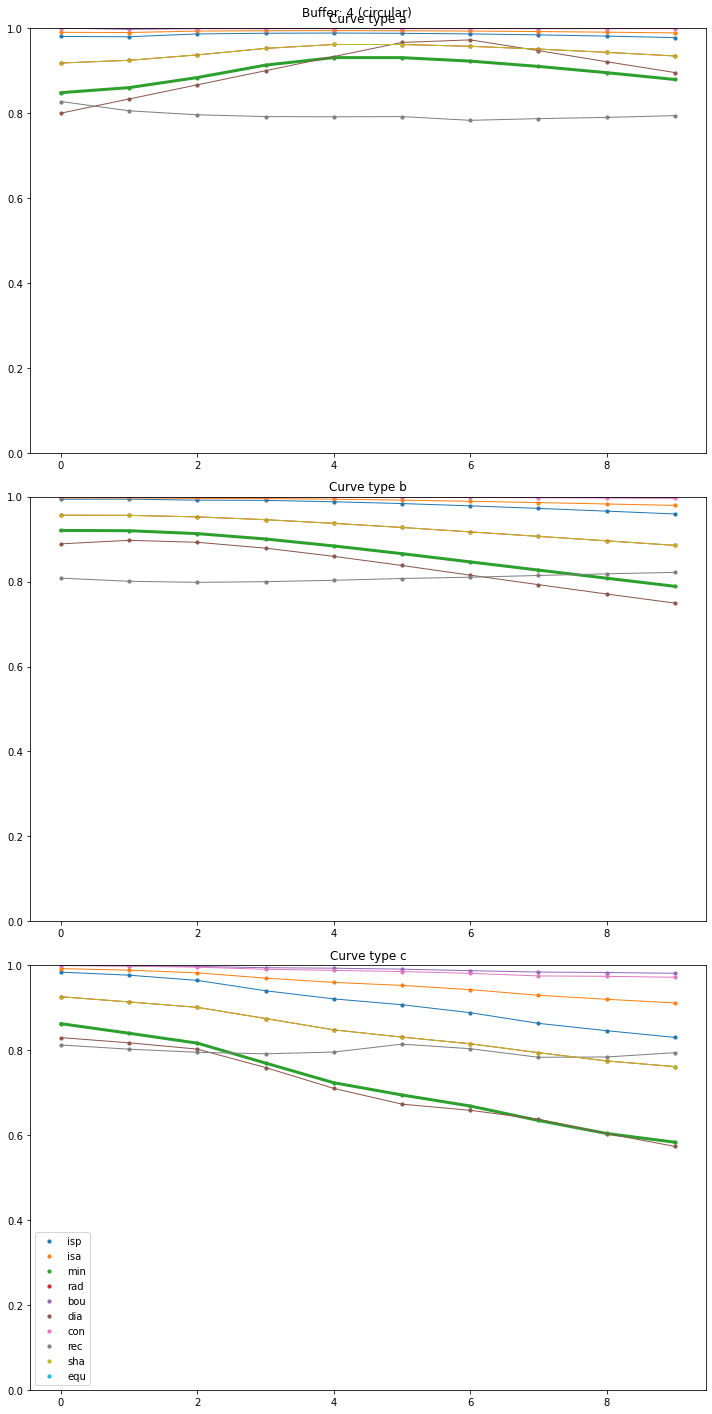

In [9]:
gd = gd4.copy()
fig, ax = plt.subplots(3,1, figsize = (10,20))
i = 0
for t in ["a", "b", "c"]: 
    
    for v in vs:

        if v == "min":
            mlw = 3
        else:
            mlw = 1

        ax[i].scatter(
            x = np.arange(len(gd[gd["type"]==t])), 
            y = gd[gd["type"]==t][v], 
            label = v,
            s = 10)
        ax[i].plot(
            np.arange(len(gd[gd["type"]==t])),
            gd[gd["type"]==t][v],
            linewidth = mlw)
        ax[i].set_title("Curve type " + t)
        ax[i].set_ylim((0,1))
    i += 1
plt.legend()
plt.suptitle("Buffer: 4 (circular)")
plt.tight_layout()

either: small area, big reock
or: big area, small reock

area/reock or reock/area

reock is already a *relative* measure


In [10]:
gd1["col"] = "red"
gd4["col"] = "blue"

In [11]:
gd = pd.concat([gd1, gd4])

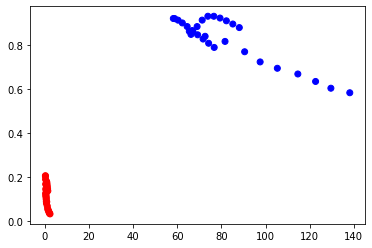

In [12]:
plt.scatter(
    x = gd["area"],
    y = gd["min"],
    color = gd["col"]
    )

*********
#### Reock of a square:

In [13]:
from shapely.geometry import Polygon
sq = Polygon([(0,1),(1,1),(1,0),(0,0)])
rs = es.minimum_bounding_circle_ratio(sq)
print("Reock of a square: ", rs)

Reock of a square:  [0.64072886]


***********
#### Try the same for actual shapes: see shapes_fua